#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [11]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime
import pandas as pd

In [12]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

In [13]:
import warnings
warnings.filterwarnings('ignore')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [14]:
sql = """SELECT 
    YEAR(hire_date) AS hire_year, COUNT(emp_no) AS emp_num
FROM
    employees
GROUP BY hire_year
ORDER BY emp_num DESC"""

In [15]:
df = pd.read_sql(sql, con)
df

,hire_year,emp_num
0,1986,36150
1,1985,35316
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

In [16]:
import matplotlib.pyplot as plt

In [37]:
df_new = df.sort_values(by='hire_year')

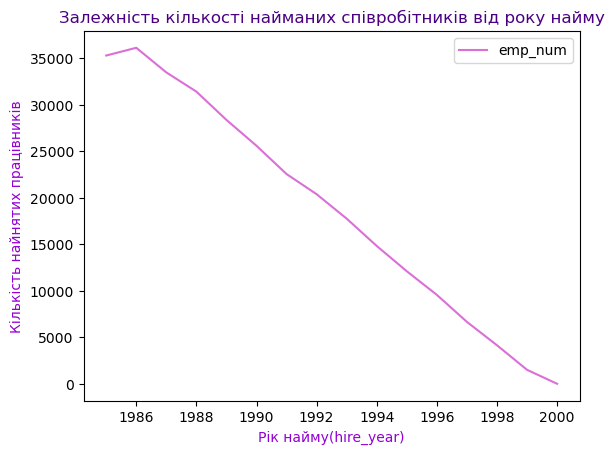

In [33]:
x = df_new.hire_year
y = df_new.emp_num
plt.plot(x,y, 'orchid', label = 'emp_num')
plt.title('Залежність кількості найманих співробітників від року найму', color = 'indigo')
plt.xlabel('Рік найму(hire_year)', color = 'darkviolet')
plt.ylabel('Кількість найнятих працівників', color = 'darkviolet')
plt.legend();

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [34]:
sql_1 = """SELECT 
    TIMESTAMPDIFF(YEAR, from_date, to_date) AS duration,
    from_date,
    to_date
FROM
    titles
WHERE
    title = 'Engineer'
        AND to_date != '9999-01-01'""" 

In [36]:
df_years = pd.read_sql(sql_1, con)
df_years

,duration,from_date,to_date
0,9,1986-12-01,1995-12-01
1,5,1990-02-18,1995-02-18
2,8,1992-12-18,2000-12-18
3,8,1987-04-03,1995-04-03
4,5,1995-03-20,2001-03-19
...,...,...,...
84015,9,1989-11-23,1998-11-23
84016,5,1989-07-30,1994-07-30
84017,0,1993-02-22,1993-10-27
84018,6,1996-05-13,2002-05-13


4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

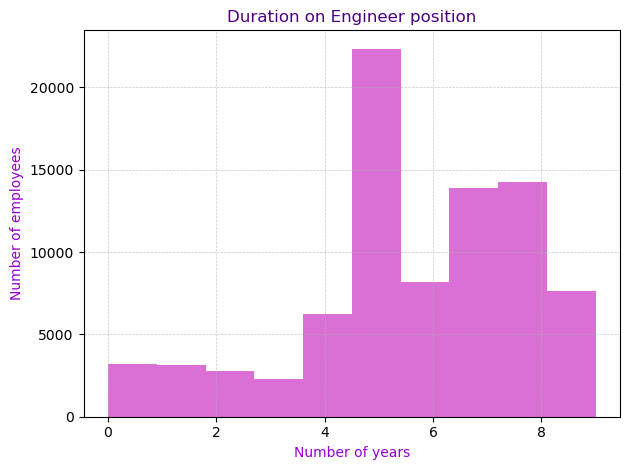

In [43]:
plt.hist(df_years['duration'], bins=10, color = 'orchid')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('Duration on Engineer position', color = 'indigo' )
plt.xlabel('Number of years', color = 'darkviolet')
plt.ylabel('Number of employees', color = 'darkviolet')
plt.tight_layout();

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [44]:
con.close()